Домашняя работа к лекции 2 по курсу Работа с заказчиком.
---------
**Методология ведения DS-проектов**

Студента: **Помойницкого Евгения**

Группа: **DS 8**

## Contents:

1. Business understanding.
2. Data understanding.
3. Data preparation.
4. Modeling.
5. Evaluation. 
6. Deployment.

## 1. Business understanding.

Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

**Task** is to predict quality score

## 2. Data understanding.

### 2.1. Libraries import.

In [256]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### 2.2 Functions.

In [257]:
def model_score(model, X_train, y_train, X_test, y_test):
    clf = model
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

def plot_model_scores(model_names, scores):
    colors = ['red', 'blue', 'green', 'orange', 'gray', 'magenta', 'purple']
    sns.set()
    plt.bar(model_names, height=scores, color=colors[:len(scores)])
    plt.ylabel('Score')
    plt.xticks(rotation=60)
    plt.show()
    
def plot_feature_importances (model, X_train, y_train):
    clf = model
    clf.fit(X_train, y_train)
    plt.barh(X.columns, width= clf.feature_importances_)

### 2.3. Loading data.

In [258]:
wines = pd.read_csv('winequalityN.csv')

In [259]:
print('Shape of the dataset is {} \n {} columns are: \n {}'.format(wines.shape, wines.shape[1], list(wines.columns) ))

Shape of the dataset is (6497, 13) 
 13 columns are: 
 ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [260]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2.4. Statistics and visualistation.

In [261]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [262]:
wines.profile_report()

**Profile report** is convenient tool to get overview of data and plan steps of feature engineering. Wines dataset looks to have data in good shape. Necessary actions to be undertaken at the stage of Data preparation:
1. Deal with duplicate rows.
2. Deal with missing values. 
3. Convert categorical column Type into numeric.

## 3. Data preparation.

### 3.1. Deal with duplicate rows.
As we can't leave duplicate rows as it is we have to drop dupicates.

In [263]:
df = wines.drop_duplicates()
df.shape

(5329, 13)

### 3.2. Deal with mising values.


In [264]:
df.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [265]:
for col, val in df.iteritems():
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [266]:
df.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.3. Convert categorical column Type into numeric.

We have all columns as numeric and column 'type' as category. 

In [267]:
df['type_oh'] = df['type'].apply(lambda x: 0 if x=='white' else 1)
df.drop('type',axis=1, inplace=True )

In [268]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_oh
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


### 3.4. Preparing train and test data.

In [269]:
X = df.drop('quality', axis=1)
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_oh
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0


## 4. Modeling.

### 4.1. Choosing models.

We take several common classifiers.

In [271]:
model_list = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
model_names = [str(x).split('(')[0] for x in model_list]

print(model_names)

['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']


## 5. Evaluation

### 5.1. Scores

In [272]:
scores = [model_score(m, X_train, y_train, X_test, y_test) for m in model_list]
for i,j in zip(model_names, scores):
    print('Score for model {} is {:.4f}'.format(i,j) )

Score for model KNeighborsClassifier is 0.4437
Score for model DecisionTreeClassifier is 0.4672
Score for model RandomForestClassifier is 0.5760
Score for model GradientBoostingClassifier is 0.5572


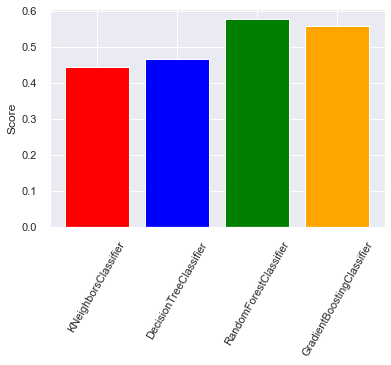

In [273]:
plot_model_scores(model_names, scores)

### 5.2. Feature importance

Checking importance of features for two best score models:

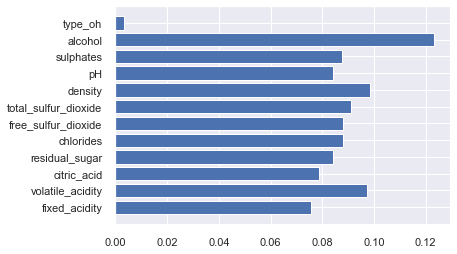

In [274]:
plot_feature_importances(RandomForestClassifier(), X_train, y_train)

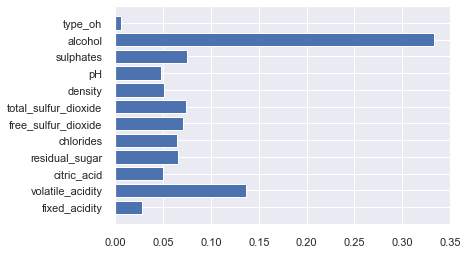

In [275]:
plot_feature_importances(GradientBoostingClassifier(), X_train, y_train)

We can notice that GradientBoostingClassifier is giving one of the best scores but is too much dependent on one single feature. Taking more features with relatively comparable importance withnesses of more reproductable model for the given set of data.

So from the sides of: A) score and B) taking into calculation more features the best option model from the chosen list is **RandomForestClassifier**

### 6. Deployment

Deployment for the given train task is uploading the ready Jupiter Notebook to gthub
/href 